<a href="https://colab.research.google.com/github/juno-yuu/COVID-Vaccine-and-Biotech-industry/blob/Erin/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/juno-yuu/COVID-Vaccine-and-Biotech-industry.git

fatal: destination path 'COVID-Vaccine-and-Biotech-industry' already exists and is not an empty directory.


In [24]:
# imports
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# vaccination dataset
vacci = pd.read_csv("/content/COVID-Vaccine-and-Biotech-industry/us_state_vaccinations.csv")

# Data Cleaning and Selection

In [4]:
vacci = vacci.dropna()

In [5]:
vacci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7211 entries, 1 to 8147
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 7211 non-null   object 
 1   location                             7211 non-null   object 
 2   total_vaccinations                   7211 non-null   float64
 3   total_distributed                    7211 non-null   float64
 4   people_vaccinated                    7211 non-null   float64
 5   people_fully_vaccinated_per_hundred  7211 non-null   float64
 6   total_vaccinations_per_hundred       7211 non-null   float64
 7   people_fully_vaccinated              7211 non-null   float64
 8   people_vaccinated_per_hundred        7211 non-null   float64
 9   distributed_per_hundred              7211 non-null   float64
 10  daily_vaccinations_raw               7211 non-null   float64
 11  daily_vaccinations            

In [6]:
# check the locations included in the dataset
vacci.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Federated States of Micronesia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indian Health Svc', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Marshall Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York State', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Republic of Palau',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [7]:
# keep stats level data
vacci = vacci[vacci.location != 'United States']

In [8]:
# # fill with previous value
# vacci.fillna(method='ffill') 

> Check the daily trend.

In [9]:
vacci['daily_vaccinations_lagged'] = vacci['daily_vaccinations'].shift(1) # get the lagged daily vaccinations data

Text(0.5, 1.0, 'Daily vaccinations across the United States')

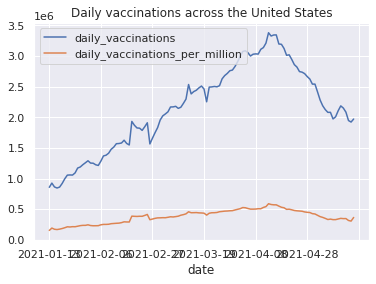

In [10]:
comb = vacci.groupby(by = 'date').sum()

sns.set_theme()
ax = plt.gca()
_ = comb.plot(y = 'daily_vaccinations', use_index = True, ax = ax)
_ = comb.plot(y = 'daily_vaccinations_per_million', use_index = True, ax = ax)
plt.title('Daily vaccinations across the United States')

> Lagged data:

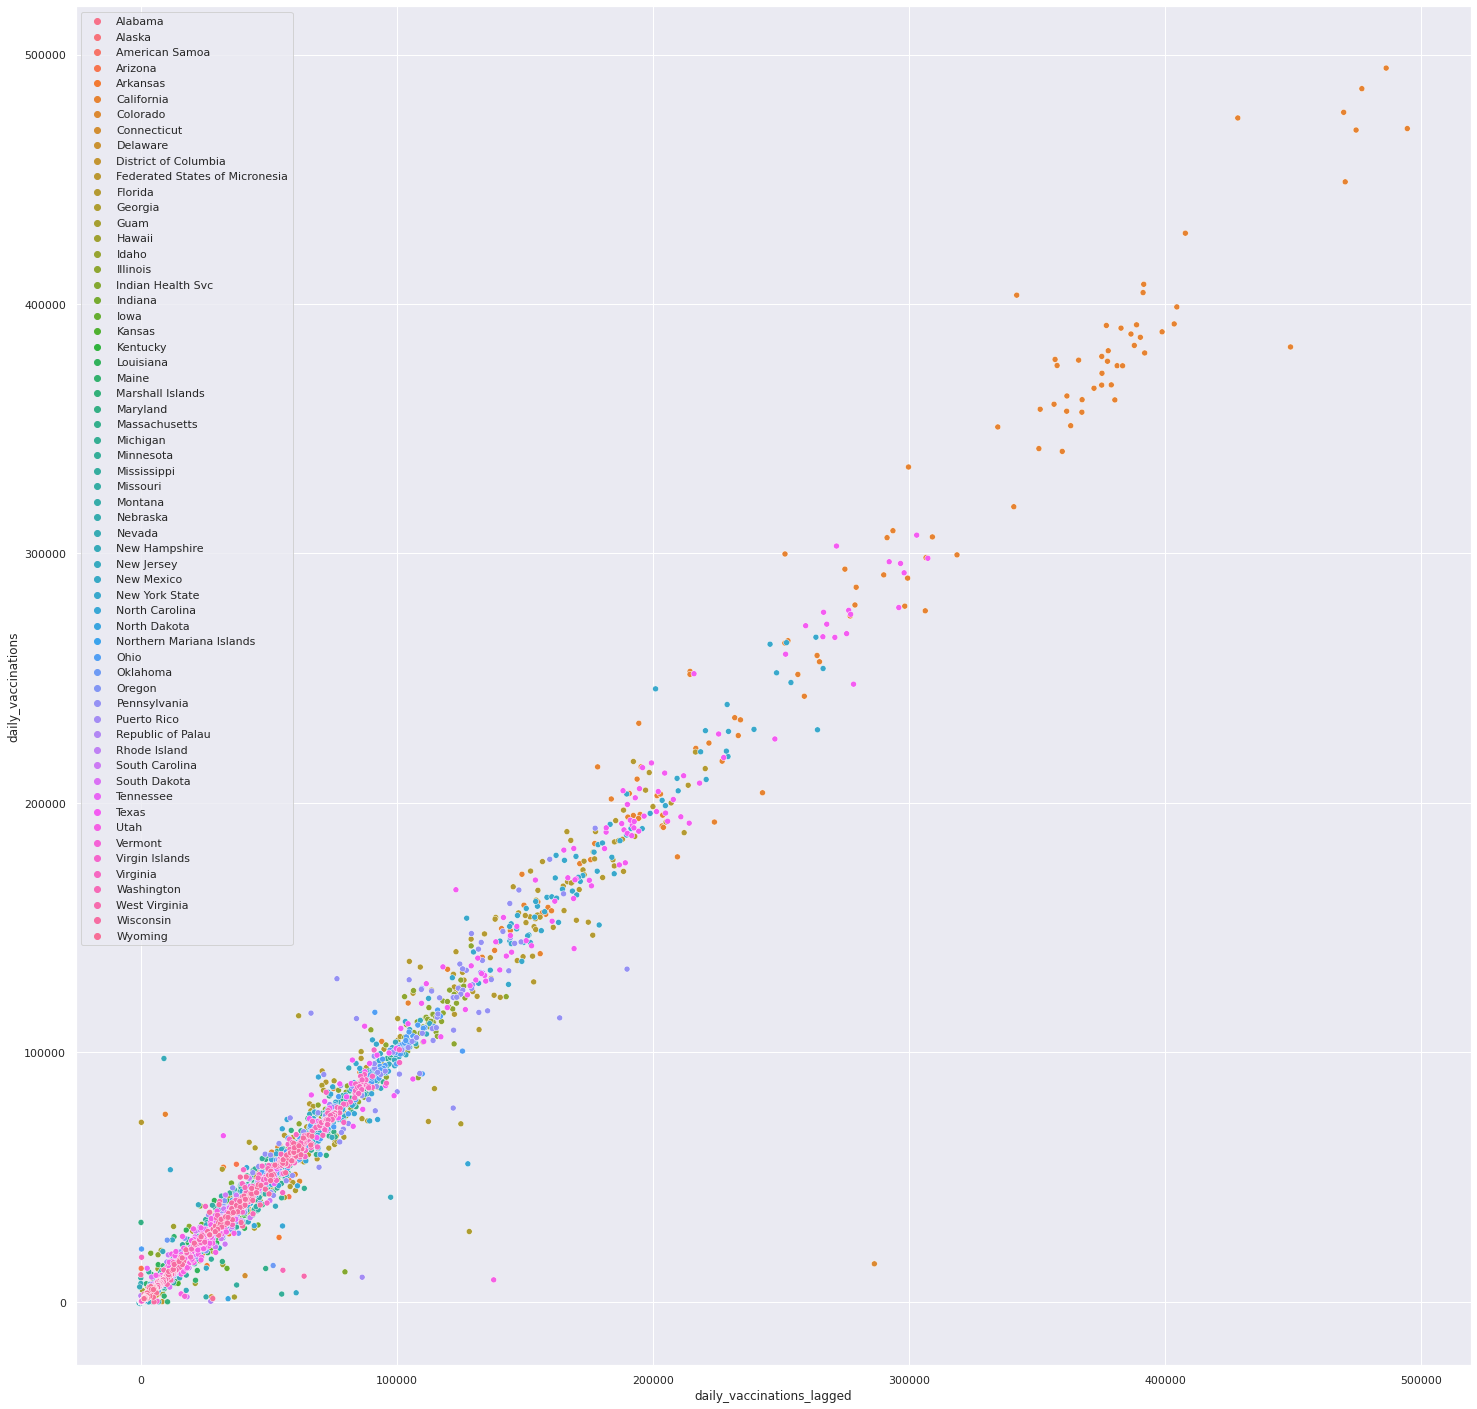

In [11]:
plt.figure(figsize = [25, 25])
ax = sns.scatterplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = vacci, hue = 'location', legend = 'brief')
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.legend(loc = 2)

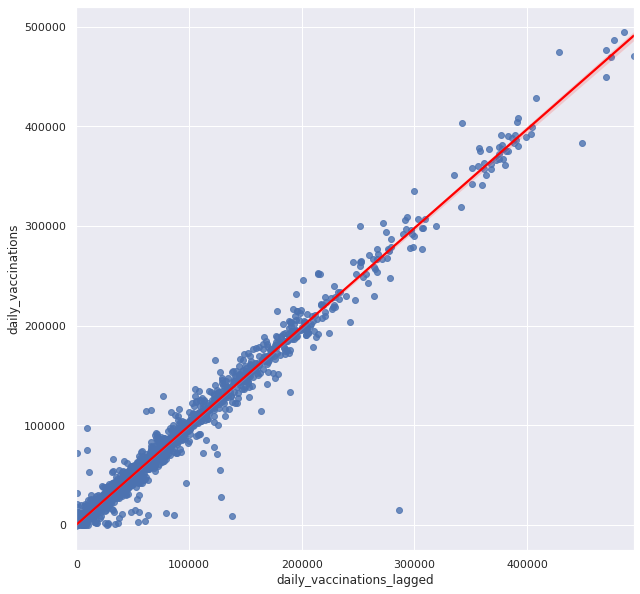

In [12]:
plt.figure(figsize = [10, 10])
_ = sns.regplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = vacci, line_kws={'color':'red'})

> Linear Regression: (lag one day)

In [13]:
data_selected = comb[['daily_vaccinations', 'daily_vaccinations_per_million']]

In [14]:
data_selected_lag = data_selected.shift(periods = 1)

In [15]:
tbreg = data_selected.join(data_selected_lag, on = 'date', how = 'inner', rsuffix = '_lagged').dropna()

In [16]:
tbreg.head()

,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_lagged,daily_vaccinations_per_million_lagged
date,,,,
2021-01-15,925032.0,190744.0,856304.0,152289.0
2021-01-19,862420.0,171345.0,925032.0,190744.0
2021-01-20,844835.0,166520.0,862420.0,171345.0
2021-01-21,859970.0,173267.0,844835.0,166520.0
2021-01-22,919714.0,183333.0,859970.0,173267.0


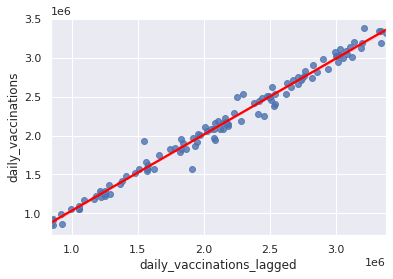

In [17]:
plt.figure()
ax = sns.regplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = tbreg, line_kws={'color':'red'})

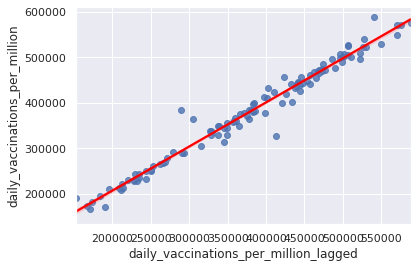

In [18]:
plt.figure()
ax = sns.regplot(x = 'daily_vaccinations_per_million_lagged', y = 'daily_vaccinations_per_million', data = tbreg, line_kws={'color':'red'})

# Linear Regression:

In [19]:
linear_model = sm.OLS(tbreg['daily_vaccinations'], tbreg['daily_vaccinations_lagged']).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     daily_vaccinations   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.218e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):                   2.02e-168
Time:                        03:46:50   Log-Likelihood:                         -1507.3
No. Observations:                 118   AIC:                                      3017.
Df Residuals:                     117   BIC:                                      3019.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
daily_vaccinations_lagged     1.0019      0.003    286.670      0.000       0.995       1.009
==============================================================================
Omnibus:                       20.471   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.041
Skew:                           0.108   Prob(JB):                     1.04e-25
Kurtosis:                       7.832   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Panel Regression:

In [20]:
!pip install linearmodels

In [21]:
from linearmodels.panel import PanelOLS
from patsy import dmatrices

In [22]:
data_panel = vacci.copy().dropna()
data_panel['date'] = pd.to_datetime(data_panel['date'], format='%Y-%m-%d', errors='ignore')
data_panel = data_panel.set_index(['location', 'date'])

> Regerssion with no FE or SE

In [23]:
dv_panel = PanelOLS.from_formula(formula = 'daily_vaccinations_lagged ~ 1 + daily_vaccinations', data = data_panel).fit()
dv_panel.summary

Dep. Variable:,daily_vaccinations_lagged,R-squared:,0.9837
Estimator:,PanelOLS,R-squared (Between):,0.9999
No. Observations:,7090,R-squared (Within):,0.9161
Date:,"Sun, May 23 2021",R-squared (Overall):,0.9837
Time:,03:46:53,Log-likelihood,-7.245e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.284e+05
Entities:,60,P-value,0.0000
Avg Obs:,118.17,Distribution:,"F(1,7088)"
Min Obs:,89.000,,
Max Obs:,119.00,F-statistic (robust):,4.284e+05


> Regression with no FE, standard errors clustered at the location level.

In [26]:
dv_panel_loc = PanelOLS.from_formula(formula = 'daily_vaccinations_lagged ~ 1 + daily_vaccinations',\
                                     data = data_panel).fit(cov_type = 'clustered', cluster_entity = True, Cluster_time = False)
dv_panel_loc.summary

Dep. Variable:,daily_vaccinations_lagged,R-squared:,0.9837
Estimator:,PanelOLS,R-squared (Between):,0.9999
No. Observations:,7090,R-squared (Within):,0.9161
Date:,"Sun, May 23 2021",R-squared (Overall):,0.9837
Time:,03:52:41,Log-likelihood,-7.245e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.284e+05
Entities:,60,P-value,0.0000
Avg Obs:,118.17,Distribution:,"F(1,7088)"
Min Obs:,89.000,,
Max Obs:,119.00,F-statistic (robust):,6.625e+05
